# Linear Regression(1 Feature)

() ()
(300,)
[-0.52817175 -1.07296862  0.86540763 -2.3015387   1.74481176]


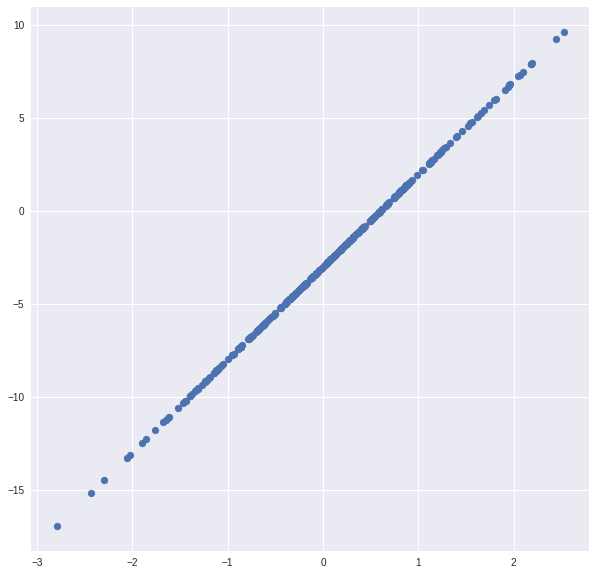

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

np.random.seed(1)
plt.style.use("seaborn")

## Set Params
N = 300
lr = 0.01
t_w, t_b = 5, -3
W, b = np.random.uniform(-3, 3, 2)
print(W.shape, b.shape)

## generate dataset
x_data = np.random.randn(N, )
y_data = x_data * t_w + t_b
# y_data += 0.5 * np.random.randn(N, ) ## noise 추가
print(x_data.shape)
print(x_data[:5])

## visualize dataset
cmap = cm.get_cmap("rainbow", lut=N)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_data, y_data)

[-2.793085    2.52832571]


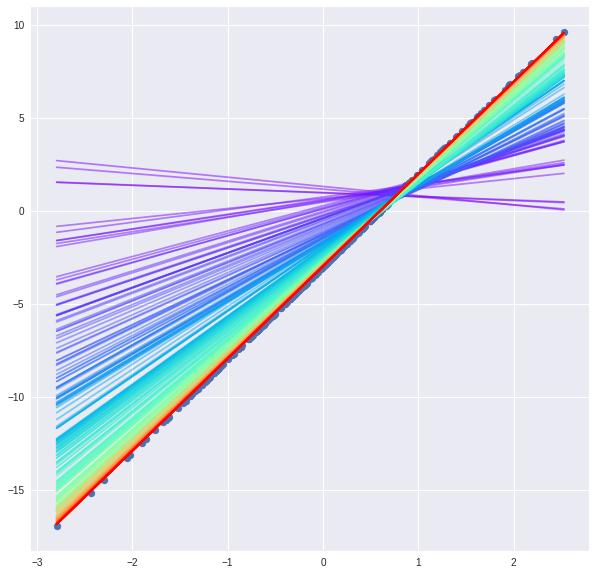

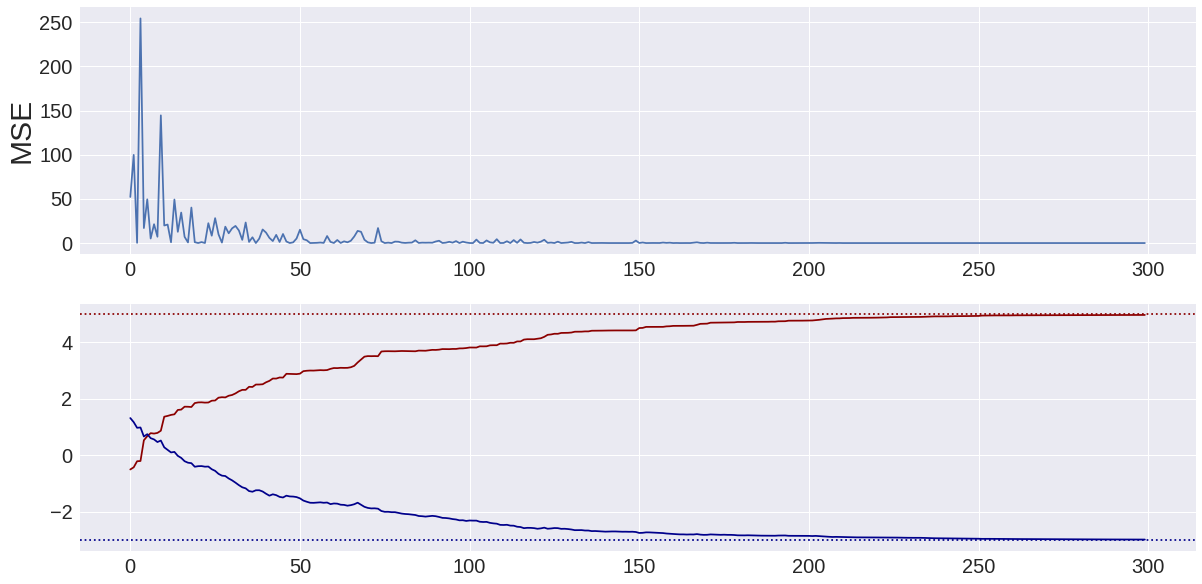

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

np.random.seed(1)
plt.style.use("seaborn")

## Set Params
N = 300
lr = 0.01
t_w, t_b = 5, -3
W, b = np.random.uniform(-3, 3, 2)

## generate dataset
x_data = np.random.randn(N, )
y_data = x_data * t_w + t_b
# y_data += 0.5 * np.random.randn(N, ) ## noise 추가

## visualize dataset
cmap = cm.get_cmap("rainbow", lut=N)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_data, y_data)

x_range = np.array([x_data.min(), x_data.max()])
print(x_range)
J_track, W_track, b_track = [], [], []

## train model and visualize models.
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    W_track.append(W)
    b_track.append(b)

    ## visualize updated model
    y_range = x_range * W + b
    ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.5)

    ## forward propagation
    pred = x * W + b
    J = (y - pred) ** 2
    J_track.append(J)

    ## gradients
    dJ_dpred = -2 * (y - pred)
    dpred_dw = x
    dpred_db = 1

    ## backpropagation
    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db

    W = W - lr * dJ_dw
    b = b - lr * dJ_db

## visualize results
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[1].plot(W_track, color="darkred")
axes[1].plot(b_track, color="darkblue")

axes[0].set_ylabel("MSE", fontsize=30)
axes[0].tick_params(labelsize=20)

axes[1].axhline(y=t_w, color="darkred", linestyle=":")
axes[1].axhline(y=t_b, color="darkblue", linestyle=":")
axes[1].tick_params(labelsize=20)

# Linear Regression(N features)

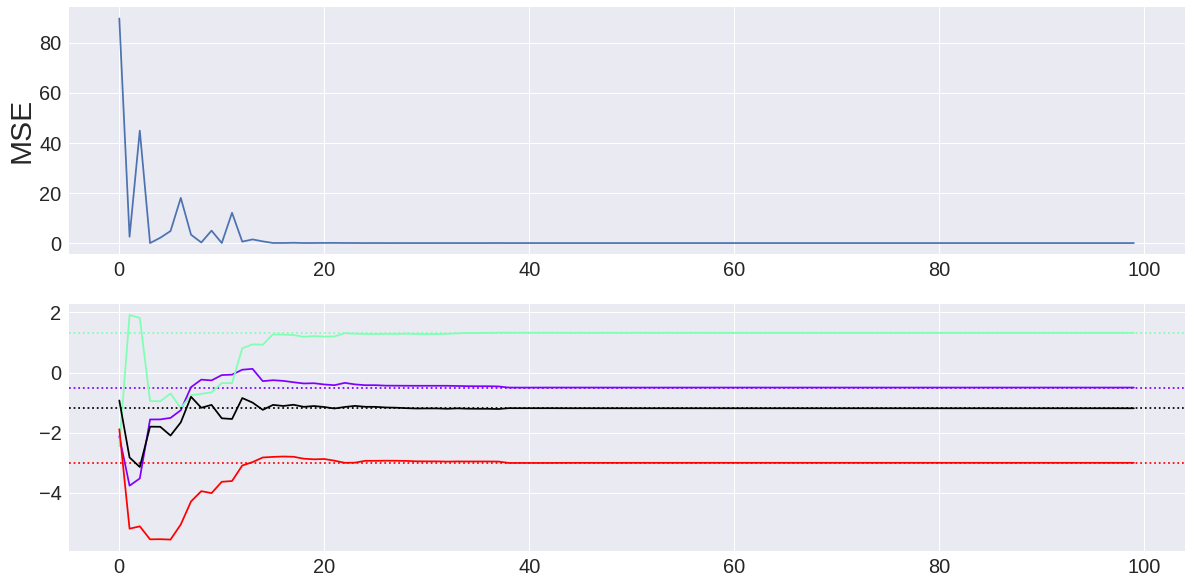

In [3]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

np.random.seed(1)
plt.style.use("seaborn")

## Set params
N, n_feature = 100, 3
lr = 0.1
target_W = np.random.uniform(-3, 3, (n_feature, 1)) ## column vector 형태로 만든다. single neuron layer.
target_b = np.random.uniform(-3, 3, (1,))

W = np.random.uniform(-3, 3, (n_feature, 1))
b = np.random.uniform(-3, 3, (1, 1))

## Generate dataset
x_data = np.random.randn(N, n_feature)
# print(f"X : {x_data.shape}") ## 100 * 3
# print(f"W : {W.shape}") ## 3 * 1
# print(f"b : {b.shape}") ## 1 * 1

y_data = np.matmul(x_data, target_W) + target_b
# print(f"Y : {y_data.shape}") ## 100 * 1

J_track, W_track, b_track = [], [], []
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
    W_track.append(W)
    b_track.append(b)

    ## forward propagation
    X = X.reshape(1, -1)
    # print(X.shape, W.shape, b.shape) ## (1, 3), (3, 1), (1, 1)

    pred = np.matmul(X, W) + b
    # print(y.shape, pred.shape) ## (1, ), (1, 1)

    J = (y - pred) ** 2
    # print(J.shape) ## (1, 1) ## 1개의 scalar
    J_track.append(J.squeeze()) ## 1개의 scalar
    
    ## gradients
    dJ_dpred = -2 * (y - pred)
    dpred_dW = X
    dpred_db = 1
    # print(dJ_dpred.shape, dpred_dW.shape, dpred_db) ## (1, 1) (1, 3) 1

    ## backpropagation
    dJ_dW = dJ_dpred * dpred_dW
    dJ_db = dJ_dpred * dpred_db
    # print(dJ_dW.shape, dJ_db.shape)

    ## parameter update
    W = W - lr * dJ_dW.T ## Gradient는 row form vector임에 유의.
    b = b - lr * dJ_db

# print(W_track[0].shape) ## (3, 1) 리스트에 10개의 3 * 1 column vector가 들어가 있다.
W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)
# print(W_track.shape, b_track.shape)

## visualize results
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel("MSE", fontsize=30)
axes[0].tick_params(labelsize=20)

cmap = cm.get_cmap("rainbow", lut=n_feature)
for w_idx, (t_w, w) in enumerate(zip(target_W, W_track)):
    axes[1].axhline(y=t_w, color=cmap(w_idx), linestyle=":")
    axes[1].plot(w, color=cmap(w_idx))

axes[1].axhline(y=target_b, color="black", linestyle=":")
axes[1].plot(b_track, color="black")
axes[1].tick_params(labelsize=20)

# Logistic Regression - About Sigmoid

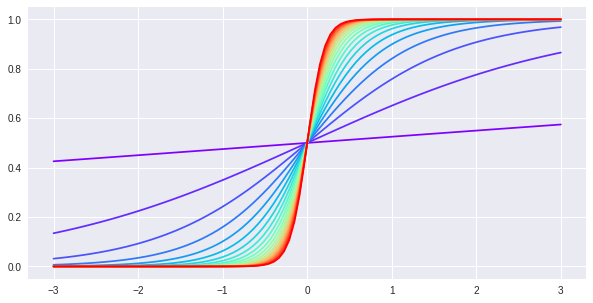

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use("seaborn")

n_w = 20
x = np.linspace(-3, 3, 100)
w_list = np.linspace(0.1, 10, n_w)
cmap = cm.get_cmap("rainbow", lut=n_w)

fig, ax = plt.subplots(figsize=(10, 5))
for w_idx, w in enumerate(w_list):
    z = x * w 
    sigmoid = 1 / (1 + np.exp(-z))

    ax.plot(x, sigmoid, color=cmap(w_idx))

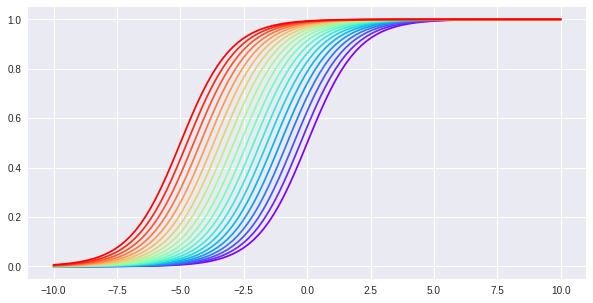

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use("seaborn")

n_b = 20
w = 1
x = np.linspace(-10, 10, 100)
b_list = np.linspace(0, 5,n_b)
cmap = cm.get_cmap("rainbow", lut=n_b)

fig, ax = plt.subplots(figsize=(10, 5))
for b_idx, b in enumerate(b_list):
    z = x * w + b 
    sigmoid = 1 / (1 + np.exp(-z))

    ax.plot(x, sigmoid, color=cmap(b_idx))


# Logistic Regression(1 Feature)

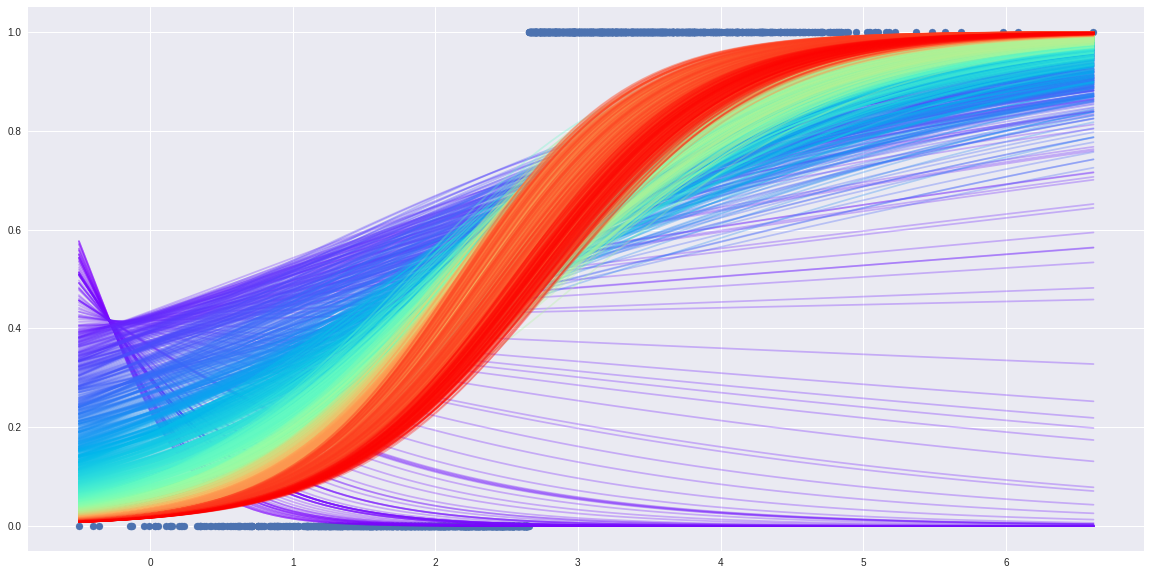

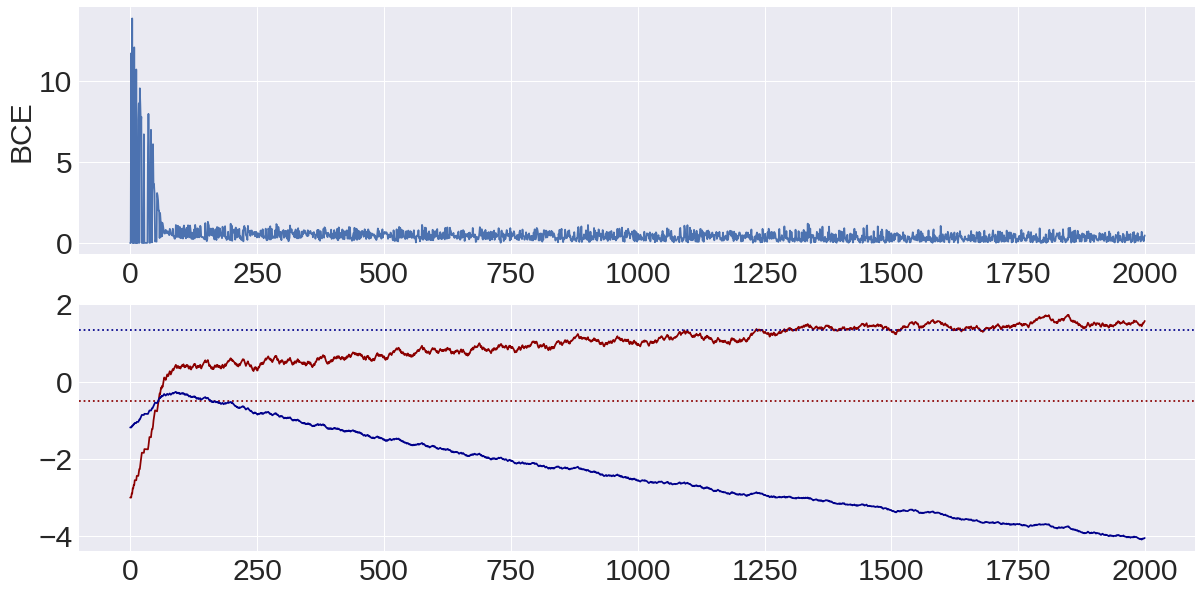

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(1)
plt.style.use("seaborn")

## Set params
N = 2000
lr = 0.03
target_w = np.random.uniform(-3, 3, (1, ))
target_b = np.random.uniform(-3, 3, (1, ))
# target_w, target_b = 1, 0

w = np.random.uniform(-3, 3, (1, ))
b = np.random.uniform(-3, 3, (1, ))

## generate dataset
db = -target_b / target_w ## decision boundary
x_data = np.random.normal(db, 1, size=(N, ))
y_data = x_data * target_w + target_b
y_data = (x_data > db).astype(int)

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_data, y_data)

J_track, w_track, b_track = [], [], []
x_range = np.linspace(x_data.min(), x_data.max(), 100)
cmap = cm.get_cmap("rainbow", lut=N)
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    w_track.append(w)
    b_track.append(b)

    ## visualize updated model
    y_range = w * x_range + b
    y_range = 1 / (1 + np.exp(-y_range))
    ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.3)

    ## forward propagation
    z = x * w + b
    pred = 1 / (1 + np.exp(-z))
    J = -(y * np.log(pred) + (1 - y)*np.log(1-pred))
    J_track.append(J)

    ## gradients
    dJ_dpred = (pred - y) / (pred * (1 - pred))
    dpred_dz = pred * (1 - pred)
    dz_dw = x
    dz_db = 1

    ## backpropagation
    dJ_dz = dJ_dpred * dpred_dz
    dJ_dw = dJ_dz * dz_dw
    dJ_db = dJ_dz * dz_db

    ## parameter update
    w = w - lr * dJ_dw
    b = b - lr * dJ_db

## visualize
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel("BCE", fontsize=30)
axes[0].tick_params(labelsize=30)

axes[1].axhline(y=target_w, color="darkred", linestyle=":")
axes[1].plot(w_track, color="darkred")
axes[1].axhline(y=target_b, color="darkblue", linestyle=":")
axes[1].plot(b_track, color="darkblue")
axes[1].tick_params(labelsize=30)

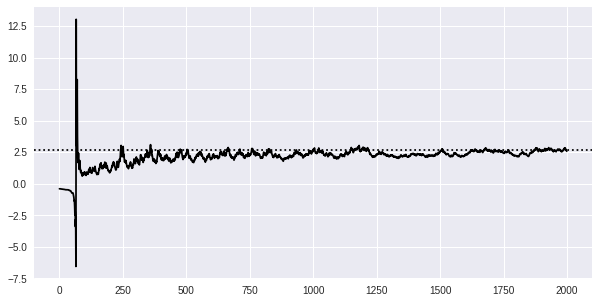

In [7]:
w_track, b_track = np.array(w_track), np.array(b_track)
db_track = -b_track / w_track
db = -target_b / target_w

fig, ax = plt.subplots(figsize=(10, 5))
ax.axhline(y=db, color="black", linestyle=":")
ax.plot(db_track, color="black")

# Logistic Regression(N features)

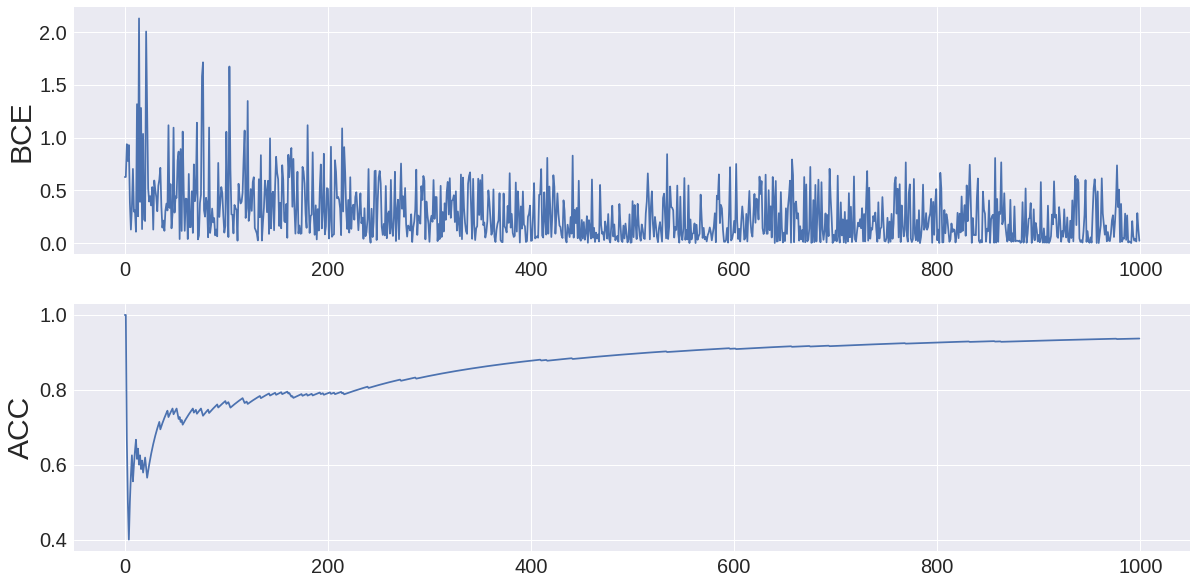

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
plt.style.use("seaborn")

## Set Params
N, n_feature = 1000, 3
lr = 0.03

target_W = np.random.uniform(-1, 1, (n_feature, 1))
target_b = np.random.uniform(-1, 1, (1, ))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

## Generate Dataset 
x_data = np.random.randn(N, n_feature)
y_data = np.matmul(x_data, target_W) + target_b
y_data = 1 / (1 + np.exp(-y_data))
y_data = (y_data > 0.5).astype(int)
# print(x_data.shape, y_data.shape) ##(100, 3) (100, 1)

J_track, acc_track = [], []
n_correct = 0
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
    ## forward propagation
    z = np.matmul(X, W) + b
    pred = 1 / (1 + np.exp(-z))
    J = -(y * np.log(pred) + (1 - y) * np.log(1 - pred))
    J_track.append(J.squeeze())
    
    ## calculate accumulated accuracy
    pred_ = (pred > 0.5).astype(int).squeeze()
    if pred_ == y:
        n_correct += 1
    acc_track.append(n_correct / (data_idx + 1))

    ## gradients
    dJ_dpred = (pred - y) / (pred * (1 - pred))
    dpred_dz = pred * (1 - pred)
    dz_dW = X.reshape(1, -1)
    dz_db = 1

    ## backpropagation
    dJ_dz = dJ_dpred * dpred_dz
    dJ_dW = dJ_dz * dz_dW
    dJ_db = dJ_dz * dz_db

    ## parameter update
    W = W - lr * dJ_dW.T
    b = b - lr * dJ_db

## visualize
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)

axes[0].set_ylabel("BCE", fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].set_ylabel("ACC", fontsize=30)
axes[1].tick_params(labelsize=20)